In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/project/gld_price_data.csv')

In [8]:
data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
data = pd.read_csv('/content/drive/MyDrive/project/Gold Price (2013-2023).csv')

In [11]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%
2582,01/02/2013,"1,689.90","1,675.80","1,695.00","1,672.10",0.06K,0.78%


In [13]:
data.shape

(2583, 7)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [15]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,5
Change %,0


In [18]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2583,2583,2583,2583,2583,2578,2583
unique,2583,2072,2061,2044,2019,1550,474
top,12/30/2022,"1,294.30","1,284.00","1,220.00","1,314.00",0.02K,0.00%
freq,1,5,5,6,5,48,29


In [23]:
data['Date'] = pd.to_datetime(data['Date'])


In [25]:
numerical_features = data.select_dtypes(include=np.number)

In [26]:
correlation = numerical_features.corr()

In [31]:
data['Price'] = data['Price'].replace(',', '', regex=True).astype(float)
# Apply the comma replacement with regex=True to handle potential variations in formatting
for col in data.select_dtypes(include=['object']).columns:
    # Iterate through all object type columns
    try:
        # Attempt to convert to numeric, errors='coerce' will replace invalid values with NaN
        data[col] = pd.to_numeric(data[col].replace(',', '', regex=True), errors='coerce')
    except (ValueError, AttributeError):
        # Skip columns that cannot be converted, such as the 'Date' column
        pass
correlation = data.corr()

<Axes: >

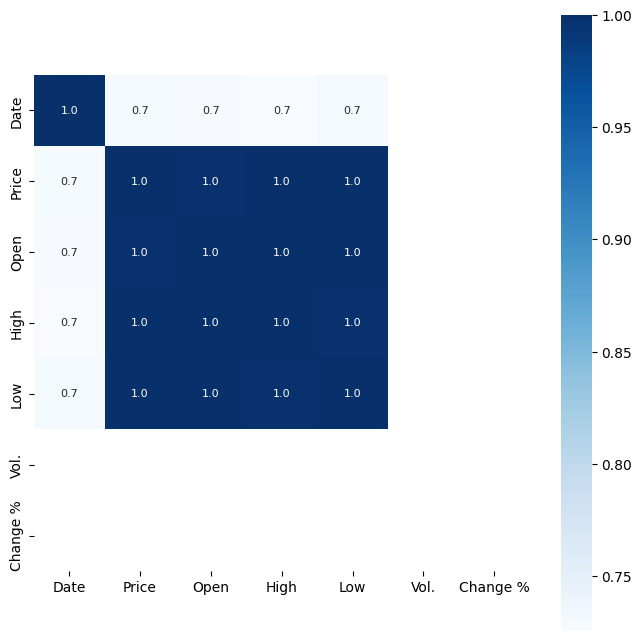

In [33]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [36]:
print(correlation['Price'])

Date        0.728212
Price       1.000000
Open        0.998600
High        0.999287
Low         0.999396
Vol.             NaN
Change %         NaN
Name: Price, dtype: float64


<ipython-input-37-78115cab0a22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],color='green')


<Axes: xlabel='Price', ylabel='Density'>

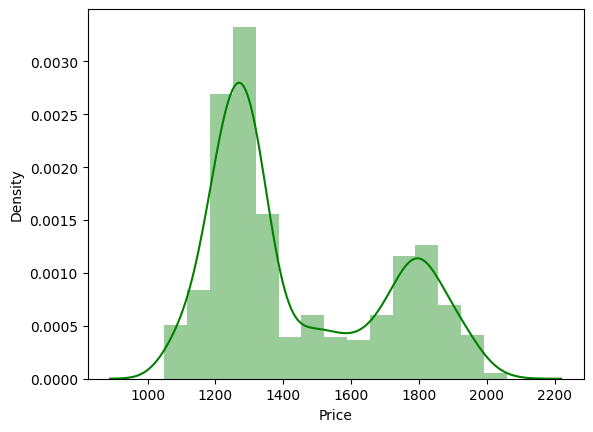

In [37]:
sns.distplot(data['Price'],color='green')

In [39]:
X = data.drop(['Date','Price'],axis=1)
Y = data['Price']

In [40]:
print(X)

        Open     High      Low  Vol.  Change %
0     1821.8  1832.40  1819.80   NaN       NaN
1     1812.3  1827.30  1811.20   NaN       NaN
2     1822.4  1822.80  1804.20   NaN       NaN
3     1808.2  1841.90  1808.00   NaN       NaN
4     1805.8  1811.95  1805.55   NaN       NaN
...      ...      ...      ...   ...       ...
2578  1651.5  1662.60  1648.80   NaN       NaN
2579  1657.3  1663.80  1645.30   NaN       NaN
2580  1664.4  1664.40  1630.00   NaN       NaN
2581  1688.0  1689.30  1664.30   NaN       NaN
2582  1675.8  1695.00  1672.10   NaN       NaN

[2583 rows x 5 columns]


In [41]:
print(Y)

0       1826.2
1       1826.0
2       1815.8
3       1823.1
4       1809.7
         ...  
2578    1663.2
2579    1647.2
2580    1649.9
2581    1675.6
2582    1689.9
Name: Price, Length: 2583, dtype: float64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [43]:
regressor = RandomForestRegressor(n_estimators=100)

In [44]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
test_data_prediction = regressor.predict(X_test)

In [46]:
print(test_data_prediction)

[1201.755  1317.466  1186.076  1247.087  1314.503  1492.529  1329.775
 1739.117  1893.211  1916.894  1705.209  1306.666  1396.085  1839.001
 1839.417  1812.227  1331.57   1265.278  1717.58   1371.725  1226.412
 1923.44   1176.322  1327.099  1808.103  1241.267  1063.163  1975.359
 1480.226  1178.345  1320.757  1215.798  1788.035  1289.332  1322.519
 1189.432  1649.833  1584.767  1774.529  1712.687  1773.855  1204.43
 1305.689  1277.194  1929.672  1687.827  1382.976  1288.834  1281.125
 1293.634  1738.759  1226.56   1790.889  1317.703  1347.599  1221.799
 1244.041  1091.705  1299.992  1232.521  1421.532  1289.656  1574.847
 1272.034  1238.056  1782.973  1088.276  1848.144  1181.618  1788.4
 1308.738  1606.837  1339.954  1789.244  1731.466  1277.534  1752.589
 1298.079  1672.87   1088.636  1314.943  1327.189  1090.736  1277.736
 1429.054  1318.362  1757.682  1276.524  1304.719  1206.518  1307.221
 1599.253  1376.431  1794.732  1525.153  1260.076  1781.172  1831.222
 1314.7    1778.293  12

In [47]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.999262074077317


In [48]:
Y_test = list(Y_test)

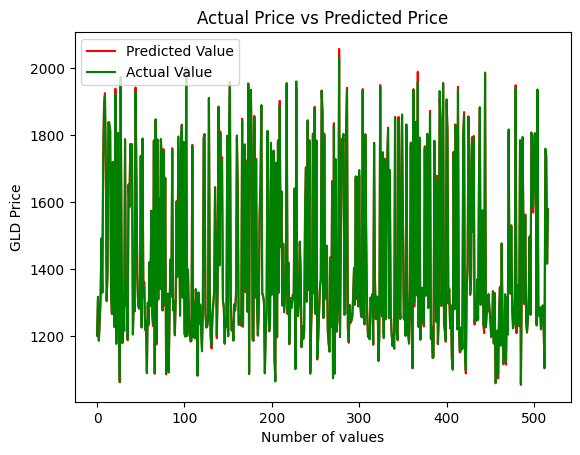

In [52]:
plt.plot(Y_test, color='red', label = 'Predicted Value')
plt.plot(test_data_prediction, color='green', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()